<a href="https://colab.research.google.com/github/YadavTarle/Stock-Market-Investment-Analysis/blob/main/Stock_Market_Investment_Analysis_by_Yadav_Tarle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Market Investment Analysis for Hedge Fund


# **GitHub Link -**

https://github.com/YadavTarle


# **Problem Statement**


*  As an analyst for a hedge fund, Here the  task is analyzing historical stock market data to identify potential investments and assess market trends. This analysis aims to provide insights into stock performance, identify opportunities and risks, and make data-driven recommendations to support the fund’s investment strategy.

**Business Objective?**

* The primary business objective is to utilize historical stock data to:

1. Identify stocks with high growth potential and favorable performance metrics.
2. Understand broader market trends, risks, and opportunities.
3. Provide actionable recommendations to inform the hedge fund’s investment decisions, ultimately aiming to maximize returns and manage investment risk.

# **Project Summary -**

  The Stock Market Investment Analysis for Hedge Fund project was undertaken to analyze historical stock market data, aiming to identify potential investments, assess market trends, and provide actionable recommendations for a hedge fund. The project's objectives included identifying stocks with high growth potential, understanding broader market trends and risks, and informing investment decisions to maximize returns and manage risks.

* Data Overview and Initial Processing:

  The dataset consisted of historical stock data for various companies listed on the New York Stock Exchange (NYSE), spanning multiple years and containing over 619,000 records. The data included daily records of opening prices, high and low prices for the day, closing prices, traded volume, and stock ticker symbols. Initial data examination involved checking for null values, data types, and basic statistics, followed by handling missing values by dropping rows with missing entries in the open, high, and low columns. The date column was converted to datetime format for time-based analysis, and outliers were identified and managed in the volume column using Interquartile Range (IQR) capping.

* Feature Engineering and Analysis:

  New features were created to enhance the analysis, including daily returns calculated as the percentage change in the close price and volatility based on the rolling standard deviation of returns. Univariate analysis revealed key insights into stock prices, returns, and volatility. Histograms indicated that most stock prices were concentrated at lower values, returns were approximately bell-shaped, and volatility showed a peak around 1 with a right skew.

  Bivariate analysis included scatter plots and correlation matrices, demonstrating a lack of strong relationships between returns and volatility. The correlation matrix confirmed a near-zero linear relationship between these variables. Time series analysis highlighted an upward trend in stock prices from 2013 to 2018, along with volatility spikes and cyclic patterns indicating periods of high trading activity or economic events.

* Visualization and Insights:

  Various visualizations, including scatter plots, histograms, and candlestick charts, were used to gain deeper insights. Scatter plots showed no clear relationship between returns and volatility, while candlestick charts provided detailed views of price movements, trends, and market sentiment. Moving averages (both simple and exponential) were calculated and plotted to identify short-term and long-term trends, aiding in the detection of potential trend reversals and support/resistance levels.

* Identifying Volatile and Stable Stocks:

  The analysis distinguished between the most and least volatile stocks. Stocks like CHK (Chesapeake Energy Corporation) and FCX (Freeport-McMoRan) exhibited high volatility with significant price fluctuations, while stocks like LNT (Alliant Energy Corporation) and PEP (PepsiCo) demonstrated stability and consistent growth. Volatility and trends analysis highlighted the risks and opportunities associated with different stocks, providing valuable information for investment strategies.

* Conclusions and Recommendations:

  1. Investment Opportunity Identification: Stocks such as LNT, PEP, and PG (Procter & Gamble) showed high potential growth with consistent upward trends and lower volatility, making them attractive investment options.

  2. Market Trend Analysis: High-volatility stocks like CHK and FCX pose higher risks but can offer significant returns during favorable conditions. Stable stocks like WM (Waste Management) and KO (Coca-Cola) offer reliable investment opportunities with lower risk.

  3. Actionable Recommendations: The hedge fund should diversify its portfolio by investing in a mix of high-growth and stable stocks, closely monitor high-volatility stocks for short-term gains, use moving averages to identify trends, stay informed on market events, and regularly review portfolio performance.

# ***Let's Begin !***

## ***1. Knowing our Dataset***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
!pip install missingno
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from datetime import date
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import matplotlib as mpl
import pymysql
!pip install mplfinance
import mplfinance as mpf
import warnings
warnings.filterwarnings('ignore')
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

### Dataset Loading

In [ ]:
shared_link = 'https://drive.google.com/file/d/1iWzW2TJgUC6qW-0-YfpuFYxFkgjWp_oO/view?usp=sharing'
file_id = shared_link.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
data_ = pd.read_csv(download_url)

### Dataset First View

In [ ]:
# Dataset First Look
data_.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data_.shape

(619040, 7)

### Dataset Information

In [ ]:
# Dataset Info
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data_[data_.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
null_values = data_.isnull().sum()
print(null_values)

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


### What did we know about our dataset?

* The dataset consists of historical stock data for various companies listed on the New York Stock Exchange (NYSE), spanning multiple years.
* This data includes daily records of opening prices, high and low prices for the day, closing prices, traded volume, and each stock's ticker symbol.
* With over 619,000 records, this dataset provides comprehensive insights into price fluctuations, trading volume, and volatility across a broad range of companies.
* The data allows for detailed analysis on multiple dimensions, such as time series patterns, comparative stock performance, and volatility trends, which are crucial for making informed investment decisions.


## ***2. Understanding the Variables***

In [ ]:
# Dataset Columns
data_.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### Variables Description

1. **Date**:
* Description: The date of each trading record, formatted as yy-mm-dd.
* Purpose: Used as a time-based index for time series analysis, crucial for understanding trends, seasonality, and cyclical behavior in stock prices.
  

2. **Open**:
* Description: The stock price at market open (in USD).
* Purpose: Often used as a reference point to see if the stock’s price increased or decreased during the trading day.

3. **High**:
* Description: The highest price reached by the stock within that trading day.
* Purpose: Reflects the peak price for the day, useful for calculating price ranges and understanding daily volatility.

4. **Low**:
* Description: The lowest price reached by the stock within that trading day.
* Purpose: Indicates the minimum price at which the stock was traded during the day, helping to assess volatility and risk levels.

5. **Close**:
* Description: The final price of the stock at the close of trading.
* Purpose: Widely used as the standard price in stock analysis, as it reflects the last traded price for the day and serves as a reference point for performance analysis.

6. **Volume**:
* Description: The total number of shares traded during the day.
* Purpose: Provides insight into the trading activity and liquidity of the stock. Higher volume often signifies higher investor interest and potential stock movement.

7. **Name**:
* Description: The ticker symbol representing each stock.
* Purpose: Used to identify and group data by specific companies, enabling company-level analysis and comparisons across different stocks.

In [ ]:
# Dataset Describe
data_.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data_.columns.tolist():
  print("No. of unique values in ",i,"is",data_[i].nunique(),".")

No. of unique values in  date is 1259 .
No. of unique values in  open is 49715 .
No. of unique values in  high is 81499 .
No. of unique values in  low is 82354 .
No. of unique values in  close is 51151 .
No. of unique values in  volume is 586441 .
No. of unique values in  Name is 505 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# trying to see every coloumn name
for i in data_.columns:
  print(i, end = ', ')

date, open, high, low, close, volume, Name, 

In [ ]:
# Drop rows with any missing values
data_ = data_.dropna()

As we have over 6L rows and only few rows  consist null values so dropping these rows will have a minimal impact on the overall analysis.

In [ ]:
# Missing Values/Null Values Count
null_values = data_.isnull().sum()
print(null_values)

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


We have successfully drop rows with null values.

In [ ]:
#First of all lets make a copied file
df=data_.copy()
df.shape

(619029, 7)

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

This step ensures that the date column is recognized as a date type, allowing us to easily perform time-based operations and analyses, such as sorting by date, resampling, or extracting specific time components (e.g., year, month).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   Name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


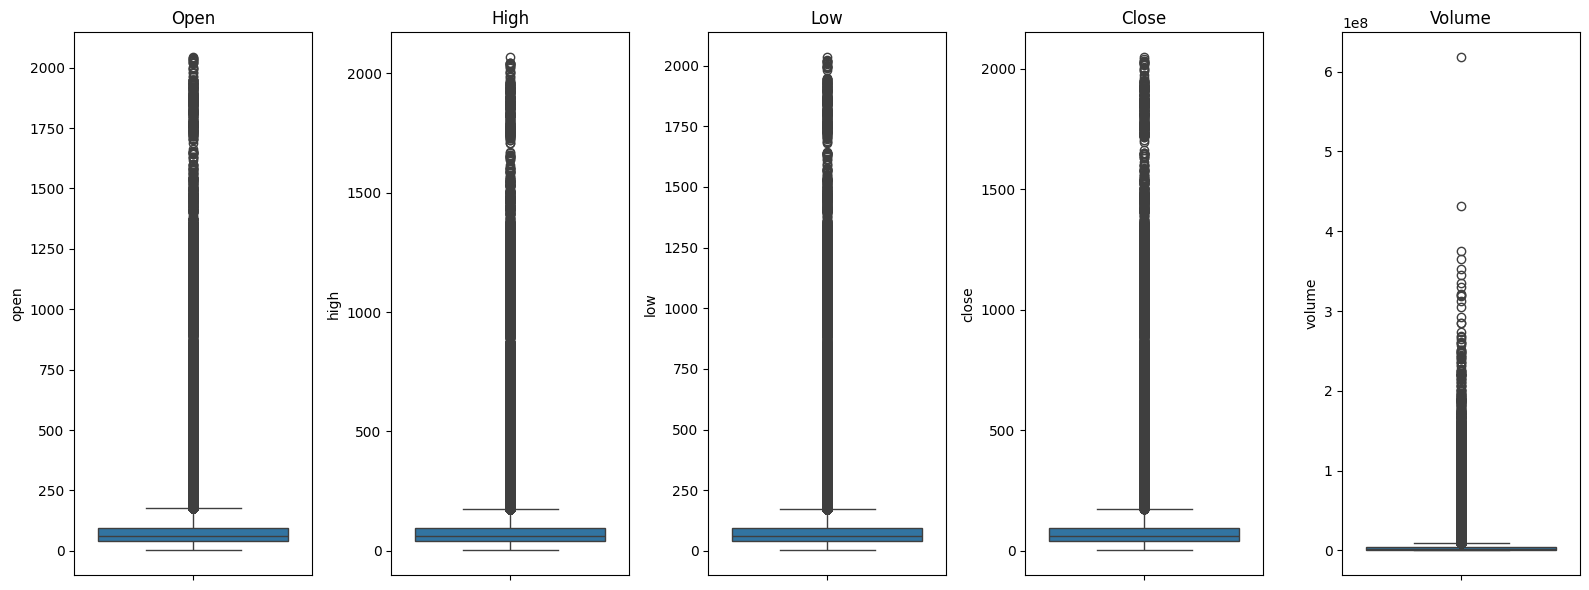

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

# List of columns to plot
columns = ['open', 'high', 'low', 'close', 'volume']

# Create a box plot for each column
for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

* This code uses Seaborn’s boxplot() to display the distribution of values for each variable.
* The plot will show outliers as points beyond the whiskers, making it easy to spot any extreme values.

* To handle the outliers in the volume column by using the IQR method, we'll follow these steps:

1. Calculate the IQR for the volume column.
2. Set upper and lower bounds based on 1.5 times the IQR.
3. Cap any values above the upper bound to the maximum allowed limit and values below the lower bound to the minimum allowed limit.

In [ ]:
# Calculate Q1, Q3, and IQR for the 'volume' column
Q1 = df['volume'].quantile(0.25)
Q3 = df['volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the 'volume' values to these limits
df['volume'] = df['volume'].clip(lower=lower_bound, upper=upper_bound)

# Verify changes
print("Volume column after capping outliers:")
print(df['volume'].describe())

Volume column after capping outliers:
count    6.190290e+05
mean     3.114589e+06
std      2.711247e+06
min      1.010000e+02
25%      1.070351e+06
50%      2.082165e+06
75%      4.284550e+06
max      9.105848e+06
Name: volume, dtype: float64


Let's again watch the box plot of 'volume' variable to vizualise outliers.

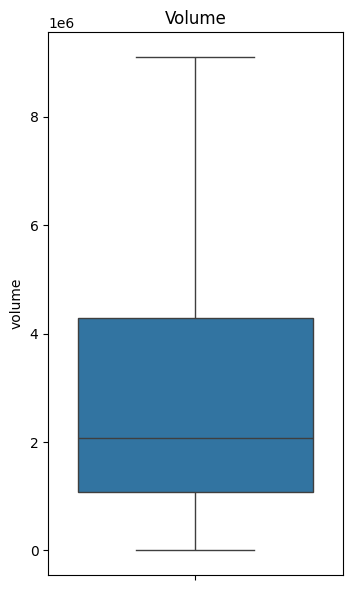

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 6))

# List of columns to plot
columns = ['volume']

# Create a box plot for vulume column
for i, col in enumerate(columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col.capitalize()}')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate daily returns as percentage change in 'close' price
df['returns'] = df['close'].pct_change() * 100  # multiply by 100 to get percentage

# Calculate volatility as rolling standard deviation of returns over a 20-day window
df['volatility'] = df['returns'].rolling(window=20).std()
df = df.dropna()

To Handle the outliers w'll use same method used for the volume feature.


In [ ]:
# Calculate Q1, Q3, and IQR for the 'returns' column
Q1_returns = df['returns'].quantile(0.25)
Q3_returns = df['returns'].quantile(0.75)
IQR_returns = Q3_returns - Q1_returns

# Define the upper and lower bounds for 'returns'
lower_bound_returns = Q1_returns - 1.5 * IQR_returns
upper_bound_returns = Q3_returns + 1.5 * IQR_returns

# Cap the 'returns' values to these limits
df['returns'] = df['returns'].clip(lower=lower_bound_returns, upper=upper_bound_returns)

In [ ]:
# Calculate Q1, Q3, and IQR for the 'volatility' column
Q1_volatility = df['volatility'].quantile(0.25)
Q3_volatility = df['volatility'].quantile(0.75)
IQR_volatility = Q3_volatility - Q1_volatility

# Define the upper and lower bounds for 'volatility'
lower_bound_volatility = Q1_volatility - 1.5 * IQR_volatility
upper_bound_volatility = Q3_volatility + 1.5 * IQR_volatility

# Cap the 'volatility' values to these limits
df['volatility'] = df['volatility'].clip(lower=lower_bound_volatility, upper=upper_bound_volatility)

This code will:

* Calculate the Q1, Q3, and IQR for both returns and volatility.
* Define the lower and upper bounds based on the IQR for each column.
* Cap the values in returns and volatility that fall outside of these bounds to bring extreme outliers within a reasonable range.

In [ ]:
# Verify changes
print("Returns column after capping outliers:")
print(df['returns'].describe())

print("\nVolatility column after capping outliers:")
print(df['volatility'].describe())

Returns column after capping outliers:
count    619009.000000
mean          0.057329
std           1.282289
min          -2.918178
25%          -0.680934
50%           0.063136
75%           0.810562
max           3.047807
Name: returns, dtype: float64

Volatility column after capping outliers:
count    619009.000000
mean          1.399060
std           0.598586
min           0.191149
25%           0.956128
50%           1.256201
75%           1.704822
max           2.827863
Name: volatility, dtype: float64


### What all manipulations have we done and insights found?

* Data Manipulations
1. Loaded and Initial Data Examination:

* Loaded the dataset containing historical stock data with 619,040 rows and 7 columns (date, open, high, low, close, volume, Name).
* Checked for null values, data types, unique values, and basic statistics.
Verified that there were no duplicate rows.
2. Handled Missing Values:

* Found a small number of missing values in the open, high, and low columns.
Dropped rows with missing values as they were relatively few compared to the dataset size.
3. Converted date Column to Datetime Format:

* Converted the date column from object to datetime format to facilitate time-based analysis.
4. Identified Outliers:

* Generated box plots for the open, high, low, close, and volume columns to identify potential outliers.
* Determined that the volume column contained significant outliers, with extreme values that skewed the data distribution.
5. Created New features:
* Returns: Daily returns can be calculated as the percentage change in the close price.

* Volatility: We can calculate volatility based on the rolling standard deviation of the returns over a given window (e.g., 20 days for monthly volatility).
6. Capped Outliers in volume, returns and volatility Using IQR:

* Calculated the Interquartile Range (IQR) for three tables.
* Set upper and lower bounds at 1.5 times the IQR.
* Capped volume values exceeding the upper bound to the maximum limit,
effectively reducing extreme outliers.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## *Univariate* Analysis:

### 1. Descriptive statistics Analysis

In [ ]:
df.describe()

,date,open,high,low,close,volume,returns,volatility
count,619009,619009.000000,619009.000000,619009.000000,619009.000000,6.190090e+05,619009.000000,619009.000000
mean,2015-08-18 01:27:40.273760512,83.025561,83.780662,82.258415,83.045536,3.114420e+06,0.057329,1.399060
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02,-2.918178,0.191149
25%,2014-05-20 00:00:00,40.220000,40.620000,39.832400,40.250000,1.070325e+06,-0.680934,0.956128
50%,2015-08-21 00:00:00,62.600000,63.160000,62.020000,62.620000,2.082060e+06,0.063136,1.256201
75%,2016-11-15 00:00:00,94.370000,95.185000,93.540000,94.410000,4.284196e+06,0.810562,1.704822
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,9.105848e+06,3.047807,2.827863
std,NaN,97.379554,98.208529,96.508406,97.389696,2.711123e+06,1.282289,0.598586


The data reveals a wide range of stock prices and trading volumes over a five-year period, with significant fluctuations in both returns and volatility. The mean stock prices indicate moderate growth, but the presence of extreme values in both returns and volatility suggests periods of high market activity and significant events impacting stock performance. This comprehensive analysis can help in making informed investment decisions by understanding historical trends and market behavior.

### 2.1 Histograms of the stock prices, returns, and volatility.

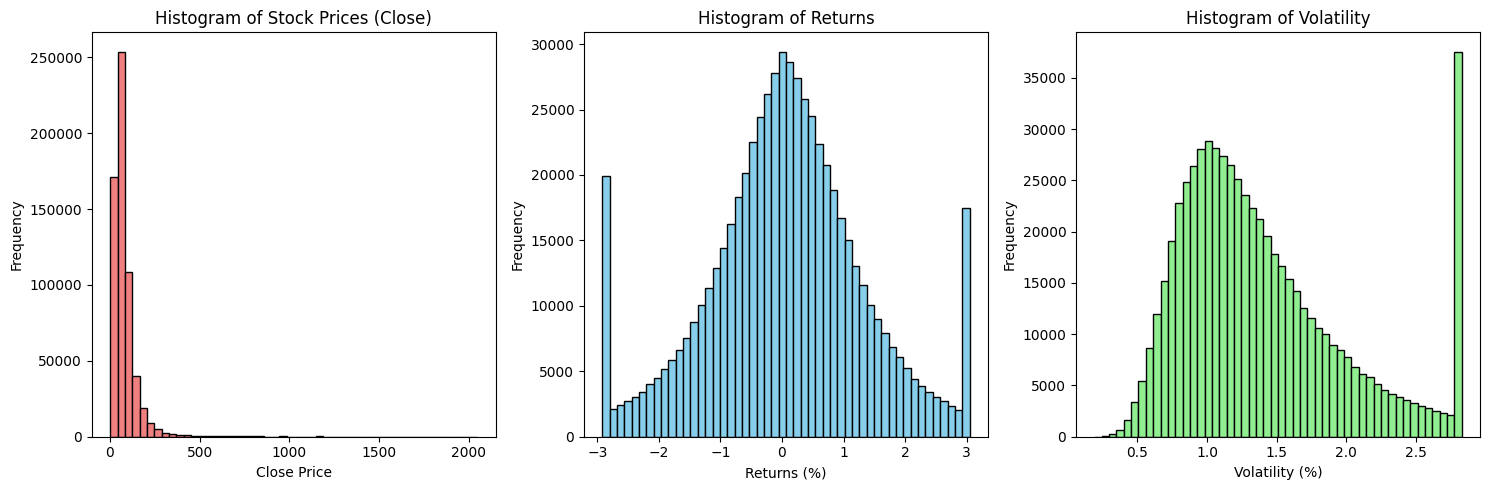

In [ ]:
plt.figure(figsize=(15, 5))

# Histogram for stock prices (close price)
plt.subplot(1, 3, 1)
plt.hist(df['close'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Histogram of Stock Prices (Close)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# Histogram for returns
plt.subplot(1, 3, 2)
plt.hist(df['returns'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Returns')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')

# Histogram for volatility
plt.subplot(1, 3, 3)
plt.hist(df['volatility'].dropna(), bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of Volatility')
plt.xlabel('Volatility (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

Histograms are useful for understanding the distribution of a variable. They show how data is spread across different ranges, making it easy to observe the frequency and spread of values.

* For stock prices, a histogram reveals the most common price ranges, allowing us to see if prices are centered around a specific value or vary widely.
* For returns, a histogram shows how frequently different returns occur, indicating if returns are normally distributed or skewed, and revealing volatility patterns.
* For volatility, a histogram helps assess the distribution of volatility levels, highlighting how often the stock is highly volatile versus stable.

##### 2. What is/are the insight(s) found from the chart?

1. Stock Prices:
* The close prices are heavily skewed to the left, indicating that most stock prices are concentrated at lower values, with a few stocks reaching significantly high prices.

2. Returs:
* The returns distribution is approximately bell-shaped, with a peak around zero, showing that most returns are close to zero. The distribution is fairly symmetric, though slightly skewed.

3. Volatilty:
* The distribution of volatility shows a peak around 1, which indicates that most stocks have a volatility close to this value. The histogram has a right skew, with a few stocks exhibiting higher volatility.

### 2.2 Box Plot of the stock prices, returns, and volatility.

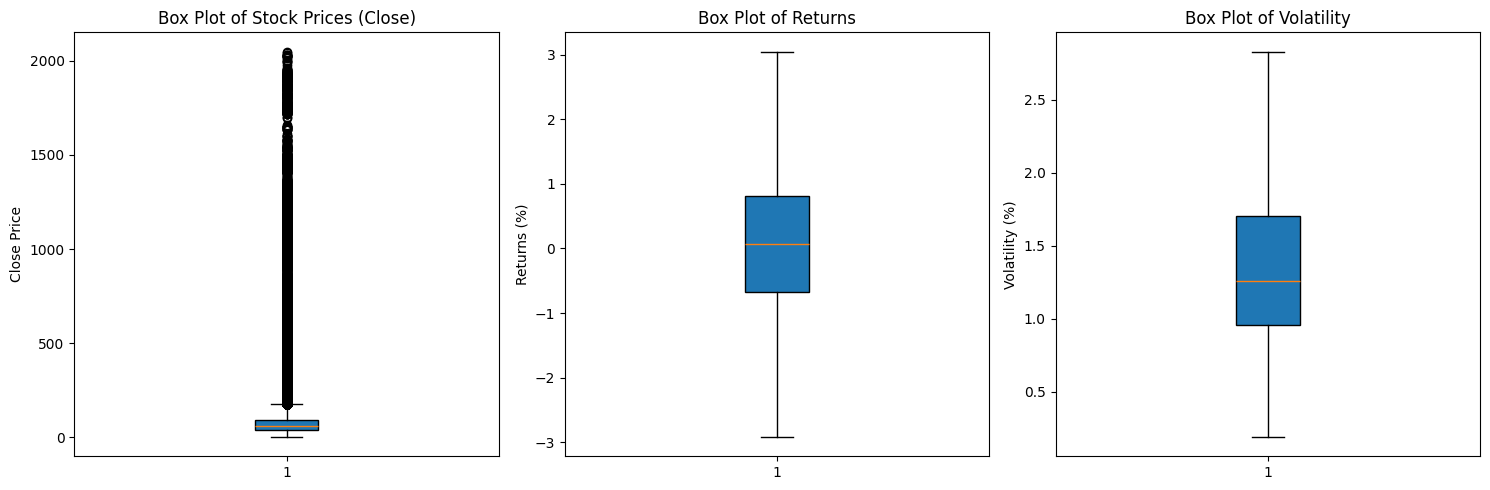

In [ ]:
plt.figure(figsize=(15, 5))

# Box plot for stock prices (close price)
plt.subplot(1, 3, 1)
plt.boxplot(df['close'].dropna(), vert=True, patch_artist=True)
plt.title('Box Plot of Stock Prices (Close)')
plt.ylabel('Close Price')

# Box plot for returns
plt.subplot(1, 3, 2)
plt.boxplot(df['returns'].dropna(), vert=True, patch_artist=True)
plt.title('Box Plot of Returns')
plt.ylabel('Returns (%)')

# Box plot for volatility
plt.subplot(1, 3, 3)
plt.boxplot(df['volatility'].dropna(), vert=True, patch_artist=True)
plt.title('Box Plot of Volatility')
plt.ylabel('Volatility (%)')

plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

Box plots provide a summary of the data in terms of median, quartiles, and potential outliers. They give a concise overview of the data's spread and the presence of extreme values.

* For stock prices, box plots help identify typical price ranges (through the interquartile range, or IQR) and highlight any unusually high or low price points as outliers.
* For returns, box plots indicate the central tendency and spread of returns, making it easy to spot periods with unusually high or low returns, which are critical in assessing risk.
* For volatility, a box plot allows us to see the typical range of volatility and any extreme values, helping to identify if volatility is stable or if there are significant spikes in certain periods.

##### 2. What is/are the insight(s) found from the chart?

1. Stock Prices:
* Most stocks have lower close prices, a small number have very high prices. This may indicate highly valued stocks that pull the average upward but do not represent the general distribution.

2. Returs:
* Most values fall within a normal range. The spread of returns around zero indicates that stocks typically experience small daily changes in price, with larger changes being rarer.

3. Volatilty:
* The volatility data shows some outliers but has a relatively tight interquartile range. This suggests that while most stocks have moderate volatility, a few are significantly more volatile, possibly due to external factors or market dynamics.

## Bivariate **Analysis**

### 2.1 Scatter Plot for Returns vs Volatility

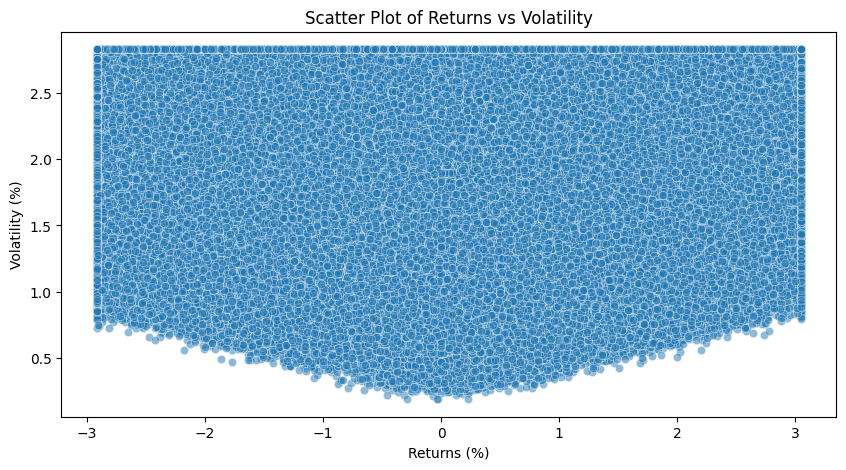

In [ ]:
# Scatter plot for Returns vs Volatility
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='returns', y='volatility', alpha=0.5)
plt.title("Scatter Plot of Returns vs Volatility")
plt.xlabel("Returns (%)")
plt.ylabel("Volatility (%)")
plt.show()

##### 1. Why did I pick the specific chart?

The scatter plot was chosen to visually assess the relationship between stock returns and volatility. This type of chart is effective for identifying trends, clusters, and any potential patterns or correlations between two continuous variables. By plotting each point for the returns and corresponding volatility, we can quickly observe if there is a linear, nonlinear, or no relationship between the two.

##### 2. What is/are the insight(s) found from the chart?

From the scatter plot, it appears that there is no clear, strong relationship between returns and volatility. The points are distributed across the entire plot area without forming a noticeable trend, which may indicate a lack of direct dependency between these variables. The spread shows a wide variation in volatility across different levels of returns, suggesting that factors other than returns might be driving volatility.

### 2.2 Correlation matrix for Returns and Volatility

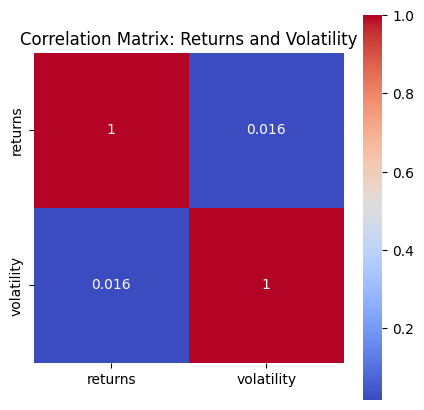

In [ ]:
# Correlation matrix for Returns and Volatility
plt.figure(figsize=(5, 5))
correlation_matrix = df[['returns', 'volatility']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix: Returns and Volatility")
plt.show()

##### 1. Why did I pick the specific chart?

A correlation matrix is ideal for quantitatively assessing the strength and direction of the relationship between returns and volatility. This matrix provides a numerical correlation coefficient, helping us understand whether the relationship observed in the scatter plot is statistically meaningful or negligible.

##### 2. What is/are the insight(s) found from the chart?

The correlation matrix shows a very low correlation coefficient (0.016) between returns and volatility. This near-zero value confirms that there is almost no linear relationship between these two variables. This aligns with the observation from the scatter plot and suggests that stock returns do not significantly influence volatility and vice versa.

## Time Series Analysis

### 1.1 Stock prices  line charts.

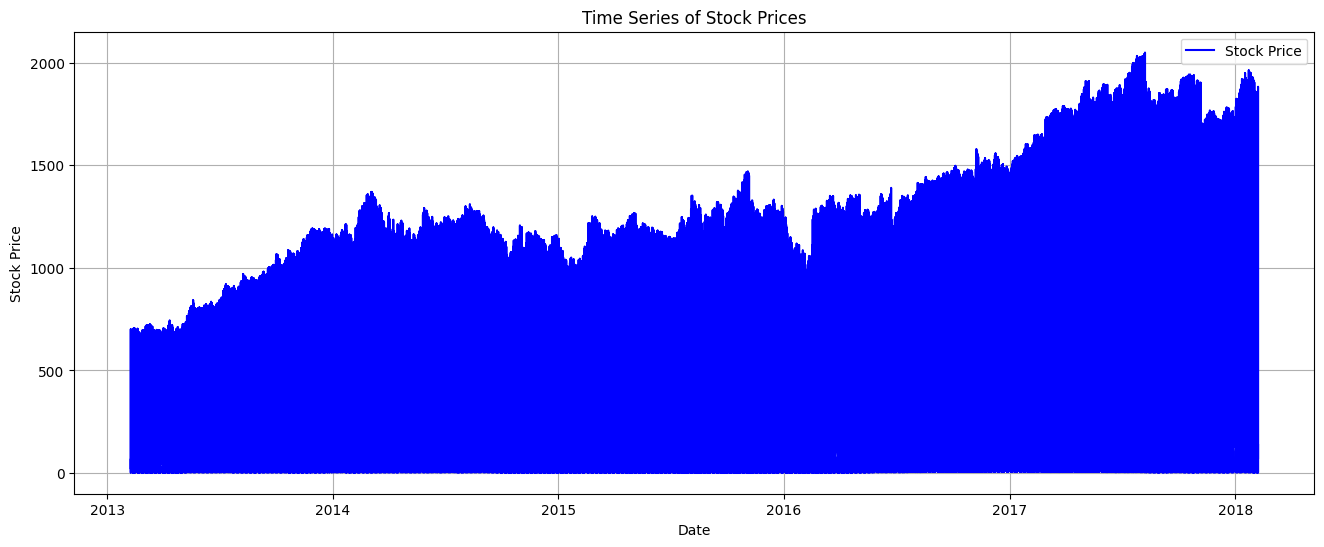

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Plotting Stock Prices
plt.figure(figsize=(16, 6))
plt.plot(df['date'], df['close'], color='blue', label='Stock Price')
plt.title('Time Series of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did I pick the specific chart?

We chose a line chart for stock prices over time because it is a commonly used method for visualizing the behavior of time series data. Line charts clearly show how stock prices fluctuate over time and are effective for identifying patterns, trends, and changes. In this case, it allows us to observe the overall movement of stock prices over the years, capturing both long-term trends and short-term fluctuations.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can observe the following insights:

* There is a clear upward trend in stock prices over the time period shown (2013–2018), indicating an overall increase in the stock's value.
* The stock price experiences several volatility spikes with both upward and downward movements, suggesting periods of higher trading activity or market events.
* There are instances where the stock price shows a temporary decline, followed by a recovery, which could indicate cyclical patterns or responses to specific economic conditions.

### 1.2 Returns on Line Chart


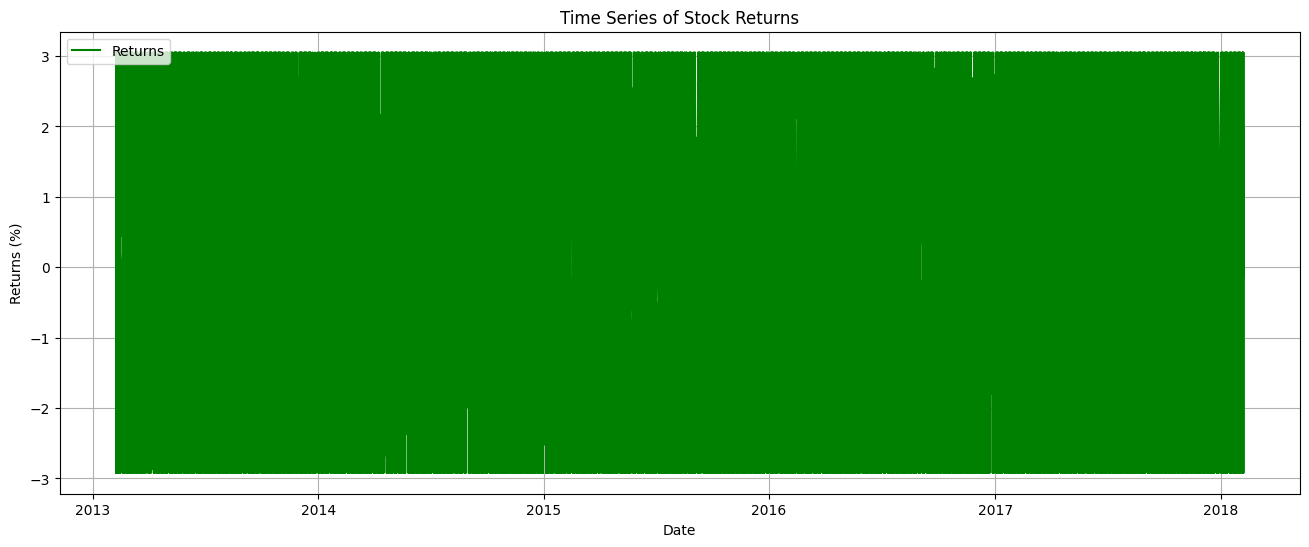

In [ ]:
# Plotting Stock Returns
plt.figure(figsize=(16, 6))
plt.plot(df['date'], df['returns'], color='green', label='Returns')
plt.title('Time Series of Stock Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid(True)
plt.show()

### 2 Moving Averages

Let's Calculate simple and Exponential Moving Averages.

In [ ]:
# Set path chunksize to avoid overflow error
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
# Calculate Moving Averages
df['SMA_30'] = df['close'].rolling(window=30).mean()  # 30-day Simple Moving Average
df['SMA_90'] = df['close'].rolling(window=90).mean()  # 90-day Simple Moving Average

In [ ]:
# Calculate Exponential Moving Averages
df['EMA_30'] = df['close'].ewm(span=30, adjust=False).mean()  # 30-day Exponential Moving Average
df['EMA_90'] = df['close'].ewm(span=90, adjust=False).mean()  # 90-day Exponential Moving Average

The SMAs and EMAs will help to observe how the stock price behaves in the short term versus the long term:

* Short-term SMA and EMA can reveal quick trend changes and minor fluctuations.
* Long-term SMA and EMA provide a smoothed trend line, which helps to observe sustained movements in the stock price, filtering out short-term noise.

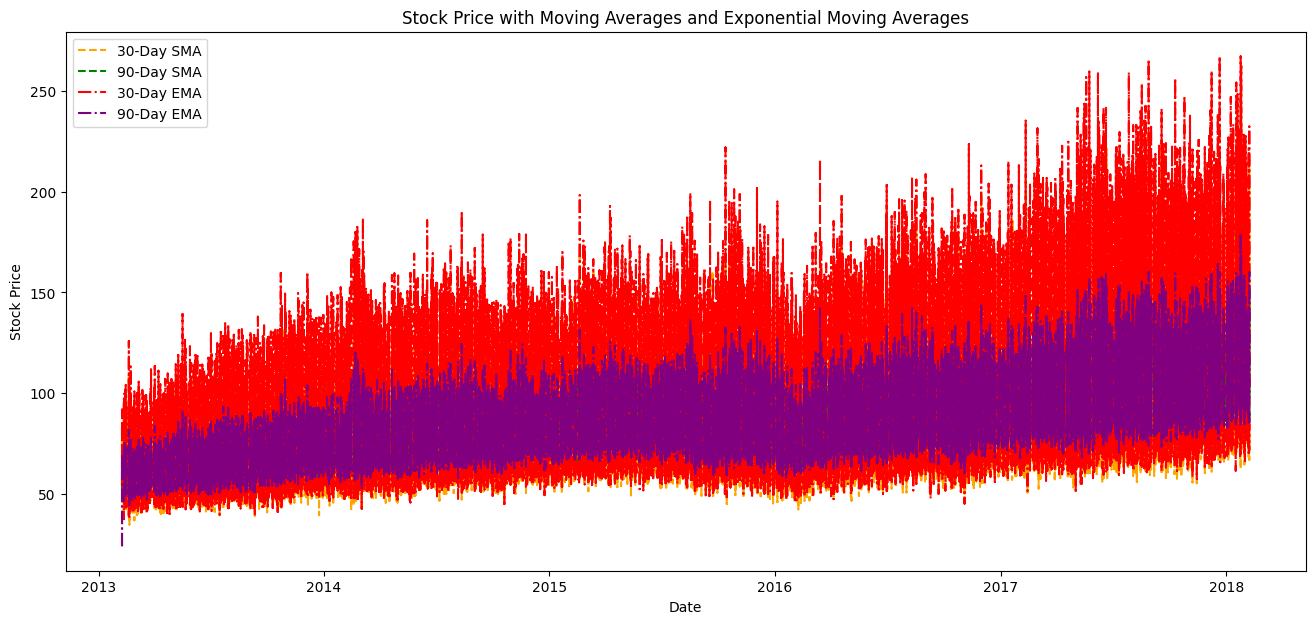

In [ ]:
df.set_index('date', inplace=True)

# Plotting Stock Price with Moving Averages and Exponential Moving Averages
plt.figure(figsize=(16, 7))

# Plotting the original Stock Price
# plt.plot(df['close'], label='Stock Price', color='blue')

# Plotting Moving Averages
plt.plot(df['SMA_30'], label='30-Day SMA', color='orange', linestyle='--')
plt.plot(df['SMA_90'], label='90-Day SMA', color='green', linestyle='--')

# Plotting Exponential Moving Averages
plt.plot(df['EMA_30'], label='30-Day EMA', color='red', linestyle='-.')
plt.plot(df['EMA_90'], label='90-Day EMA', color='purple', linestyle='-.')

# Adding plot labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with Moving Averages and Exponential Moving Averages')
plt.legend()
plt.show()

##### 1. Why did I pick the specific chart?

This specific chart was selected because it provides a comprehensive view of the stock price trends over a five-year period (2013-2018) and includes various moving averages. By comparing different moving averages, we can better understand the stock's behavior and identify potential trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

1. Trend Identification: The overall trend shows an increase in stock price over the five-year period, indicating a general upward trajectory.

2. Volatility: The stock price exhibits significant volatility, with frequent spikes and drops.

3. Moving Averages Comparison:

* 30-Day SMA (yellow line): More responsive to short-term price changes.

* 90-Day SMA (green line): Smoother, less responsive, highlighting longer-term trends.

* 30-Day EMA (red line): Reacts quickly to price changes, useful for short-term trend analysis.

* 90-Day EMA (purple line): Smoother and less responsive, ideal for identifying longer-term support and resistance levels.

4. Support and Resistance: The moving averages can act as support or resistance levels. For instance, the stock price often interacts with the 90-Day EMA, suggesting its significance in trading decisions.

### 3. Trends, Seasonality, and Cyclical effects

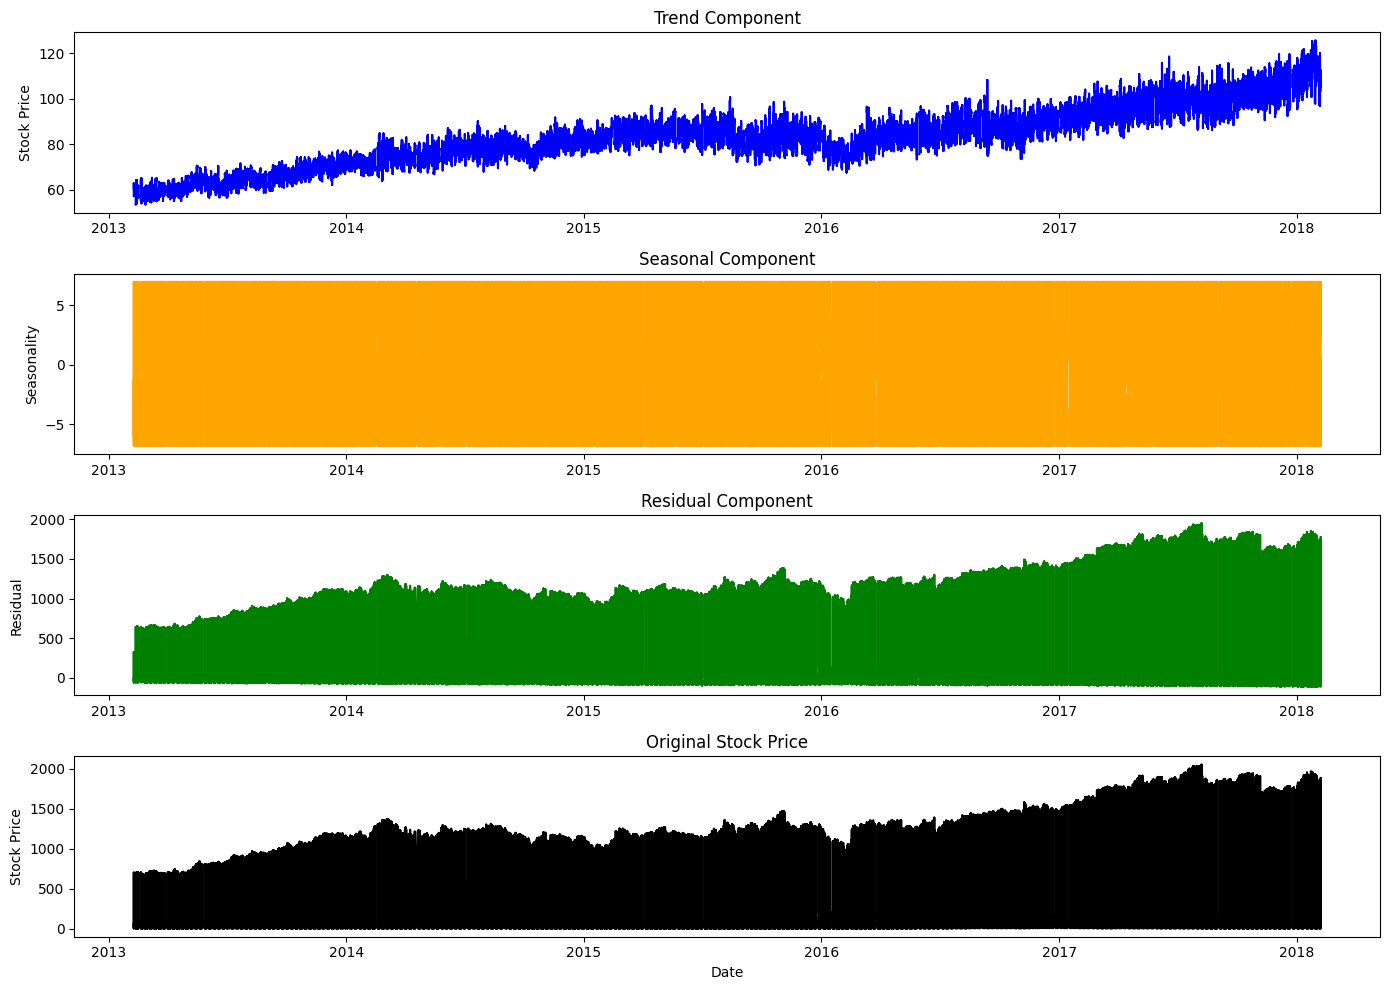

In [ ]:
# Decompose the stock price data
# We can specify a weekly seasonality with `period=7`
decomposition = seasonal_decompose(df['close'], model='additive', period=365)

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

# Trend component
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, color='blue')
plt.title('Trend Component')
plt.ylabel('Stock Price')

# Seasonal component
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, color='orange')
plt.title('Seasonal Component')
plt.ylabel('Seasonality')

# Residual component
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, color='green')
plt.title('Residual Component')
plt.ylabel('Residual')

# Original Stock Price for reference
plt.subplot(4, 1, 4)
plt.plot(df['close'], color='black')
plt.title('Original Stock Price')
plt.ylabel('Stock Price')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

##### 1. Why did I pick the specific chart?

1. Seasonal Decomposition:

* We use seasonal_decompose from statsmodels.tsa.seasonal, specifying model='additive' (which is appropriate when the seasonal and trend components are additive rather than multiplicative).
* period=365 is chosen to capture yearly seasonality (if applicable in the stock data). Adjust the period if you observe seasonality at other intervals, like weekly or monthly.
2. Plotting Each Component:

*  Trend Component: Shows the overall direction or long-term progression of the stock prices.
* Seasonal Component: Captures any recurring patterns in the data (e.g., seasonal variations).
* Residual Component: Represents the randomness or noise in the data after removing the trend and seasonality.

##### 2. What is/are the insight(s) found from the chart?

1. Trend Component:

* The stock price exhibits a clear upward trend from 2013 to 2018, indicating that the stock has been increasing steadily over this period.

2. Seasonal Component:

* The seasonal component remains constant throughout the years, suggesting there are no significant seasonal patterns in the stock prices.

3. Residual Component:

* The residual component shows the variability left in the stock prices after removing the trend and seasonal components. There are fluctuations present, indicating other factors influencing the stock price that are not captured by the trend or seasonal patterns.

4. Original Stock Price:

* The original stock price plot combines the trend, seasonal, and residual components, showing the actual stock prices over time.

  Summary of Insights:

* Upward Trend: The stock price has consistently increased from 2013 to 2018.


* Unexplained Variability: The residuals indicate some fluctuations not explained by the trend and seasonal components, pointing to other influencing factors.

## Data Visualization

### Most Volitile Stocks

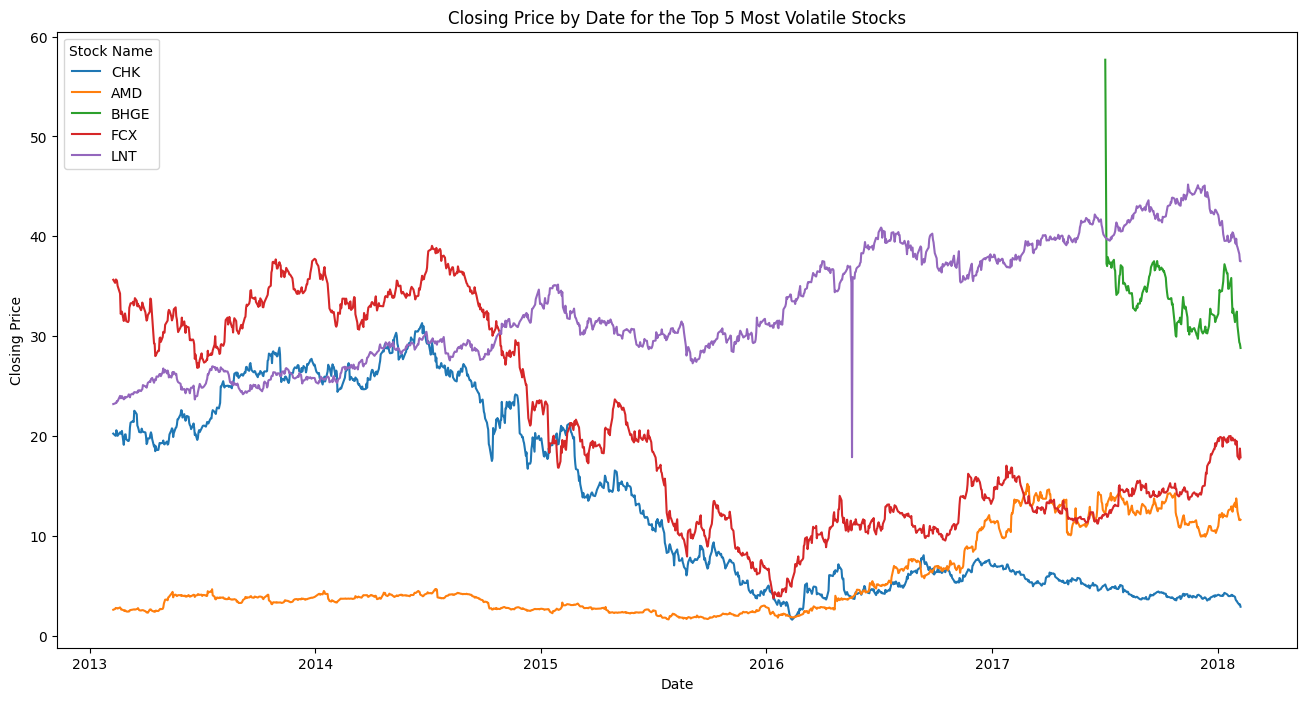

In [ ]:
df['daily_return'] = df.groupby('Name')['close'].pct_change()

# Calculate volatility (standard deviation of daily returns) for each stock
volatility = df.groupby('Name')['daily_return'].std()

# Get the top 5 stocks with the highest volatility
top_10_volatile_stocks = volatility.nlargest(5).index

# Set up the figure size for better readability
plt.figure(figsize=(16, 8))

# Loop through each of the top 5 volatile stocks and plot their closing price
for stock in top_10_volatile_stocks:
    # Filter the data for the current stock
    stock_data = df[df['Name'] == stock]

    # Plot the closing price for the current stock
    plt.plot(stock_data.index, stock_data['close'], label=stock)

# Adding plot labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price by Date for the Top 5 Most Volatile Stocks')
plt.legend(title="Stock Name", loc='upper left')
plt.show()

##### 1. Why did I pick the specific chart?


The specific chart was chosen to analyze the volatility and trends in the closing prices of the top five most volatile stocks over a period of five years (2013-2018). This chart provides a clear visual representation of how each stock's price fluctuated over time, making it easier to identify patterns, trends, and significant changes in the stock prices. The color-coded lines for each stock (CHK, AMD, BHGE, FCX, and LNT) help distinguish their individual performances and comparative analyses.

##### 2. What is/are the insight(s) found from the chart?




* Volatility and Trends: The chart demonstrates significant volatility across all five stocks. Notably, CHK (blue) and FCX (green) display pronounced peaks and troughs, indicating high volatility.

* Stock Performance: LNT (gray) consistently maintains a higher closing price compared to the other stocks, suggesting relatively better performance or stability.

* Significant Events: Noticeable spikes and drops in some stock prices, such as the sharp increase in BHGE (yellow) around 2017 followed by a rapid decline, hint at significant events or market reactions impacting these stocks.

* Comparative Analysis: The chart allows for a comparative view, highlighting that AMD (red) had the lowest closing prices throughout the period, whereas LNT (gray) had the highest, providing insights into their relative performance.

### Least Volatile Stocks

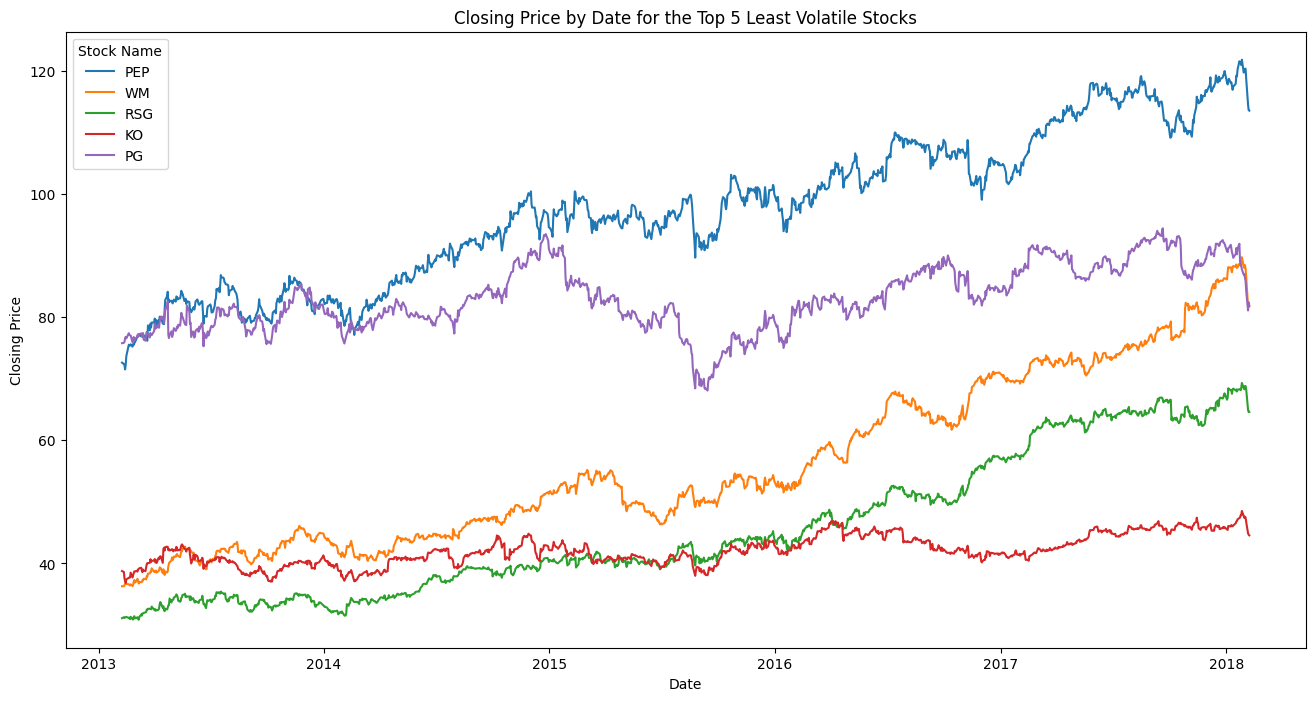

In [ ]:
# Get the top 5 stocks with the lowest volatility
top_5_least_volatile_stocks = volatility.nsmallest(5).index

# Set up the figure size for better readability
plt.figure(figsize=(16, 8))

# Loop through each of the top 5 least volatile stocks and plot their closing price
for stock in top_5_least_volatile_stocks:
    # Filter the data for the current stock
    stock_data = df[df['Name'] == stock]

    # Plot the closing price for the current stock
    plt.plot(stock_data.index, stock_data['close'], label=stock)

# Adding plot labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price by Date for the Top 5 Least Volatile Stocks')
plt.legend(title="Stock Name", loc='upper left')
plt.show()

##### 1. Why did I pick the specific chart?

The specific chart was chosen to analyze the closing prices of the top 5 least volatile stocks over a five-year period from 2013 to 2018. This chart provides a clear visual representation of stability and trends in the stock market, highlighting the performance of stable stocks. The different colored lines for each stock (PEP, WM, RSG, KO, and PG) allow for easy comparison and analysis.

##### 2. What is/are the insight(s) found from the chart?

* Stability Over Time: The stocks represented (PEP, WM, RSG, KO, PG) show relatively stable trends in their closing prices, with less fluctuation compared to more volatile stocks.

* Consistent Growth: Most of the stocks exhibit consistent growth over the five-year period, indicating steady performance.

* Comparative Analysis: PEP (blue) and PG (gray) maintain higher closing prices throughout the period, suggesting better performance in terms of stability and growth.

* Market Confidence: The stability and consistent growth of these stocks can be indicative of market confidence in these companies.

### Candlestick Chart for Most Volatile Stock

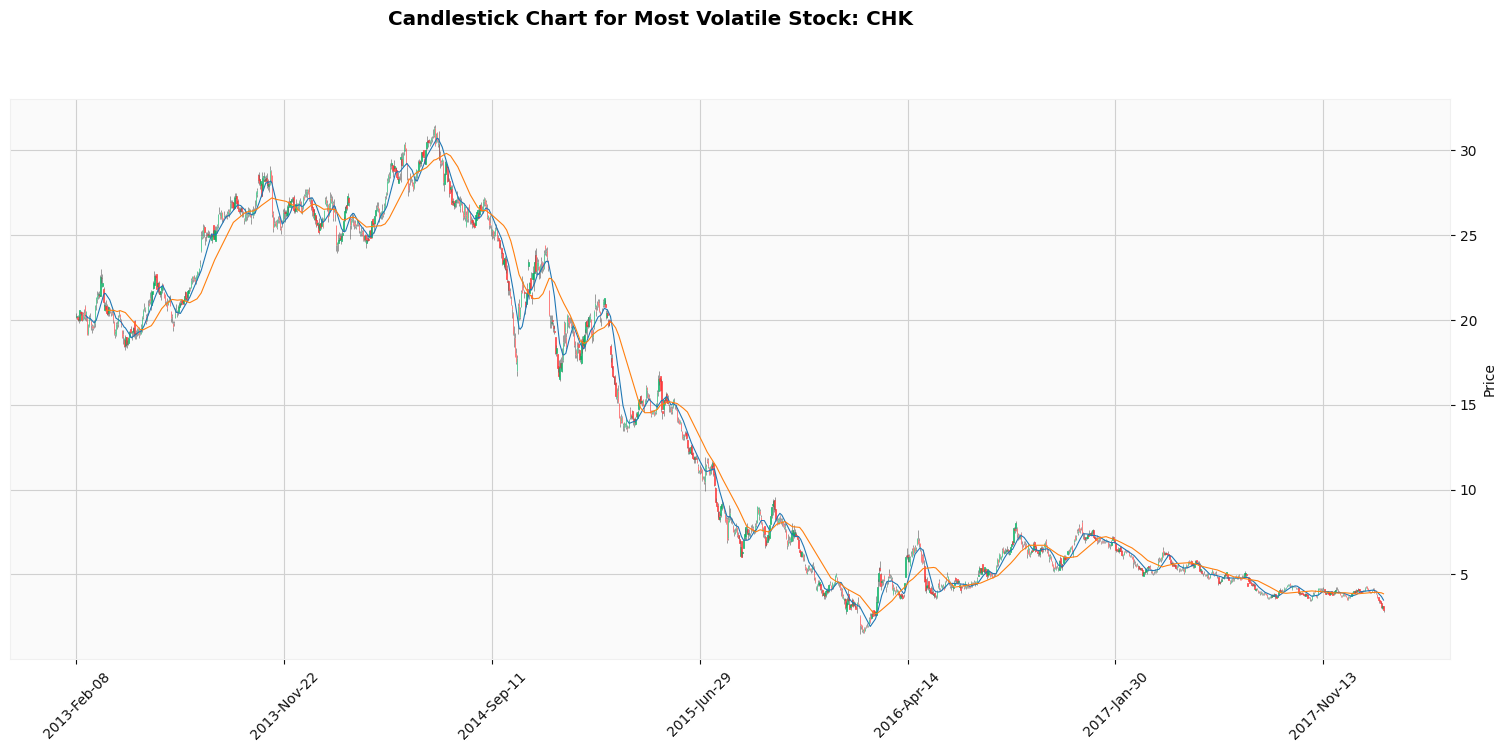

In [ ]:
# Calculate volatility (standard deviation of daily returns) for each stock
volatility = df.groupby('Name')['daily_return'].std()

# Get the most volatile stock
most_volatile_stock = volatility.idxmax()

# Select data for the most volatile stock
stock_data = df[df['Name'] == most_volatile_stock][['open', 'high', 'low', 'close', 'volume']]

# Plotting the candlestick chart using mplfinance
mpf.plot(
    stock_data,
    type='candle',
    style='yahoo',  # 'yahoo' style mimics Yahoo Finance charts
    title=f'Candlestick Chart for Most Volatile Stock: {most_volatile_stock}',
    ylabel='Price',
    mav=(10, 30),  # Moving averages (optional) - 10 and 30 day MA shown
    figsize=(20, 8)
)
plt.show()


##### 1. Why did I pick the specific chart?

* The candlestick chart is a versatile tool for visualizing price movements and market sentiment over time. It provides a wealth of information in a compact format, making it a valuable tool for technical analysis.

    Specifically, this chart was selected due to the following reasons:

* Clarity and Readability: The candlestick chart effectively conveys price action, including open, high, low, and close prices, making it easy to interpret trends and patterns.
* Moving Averages: The inclusion of moving averages (10-day and 30-day) adds context by highlighting short-term and long-term trends, facilitating trend identification and potential reversal signals.
* Volatility: The chart depicts a period of high volatility in the stock, making it an ideal candidate for analyzing price fluctuations and potential trading opportunities.
* Historical Context: The chart covers a significant time frame, allowing for the observation of long-term trends and potential cyclical patterns.

### Candlestick Chart for least Volatile Stock

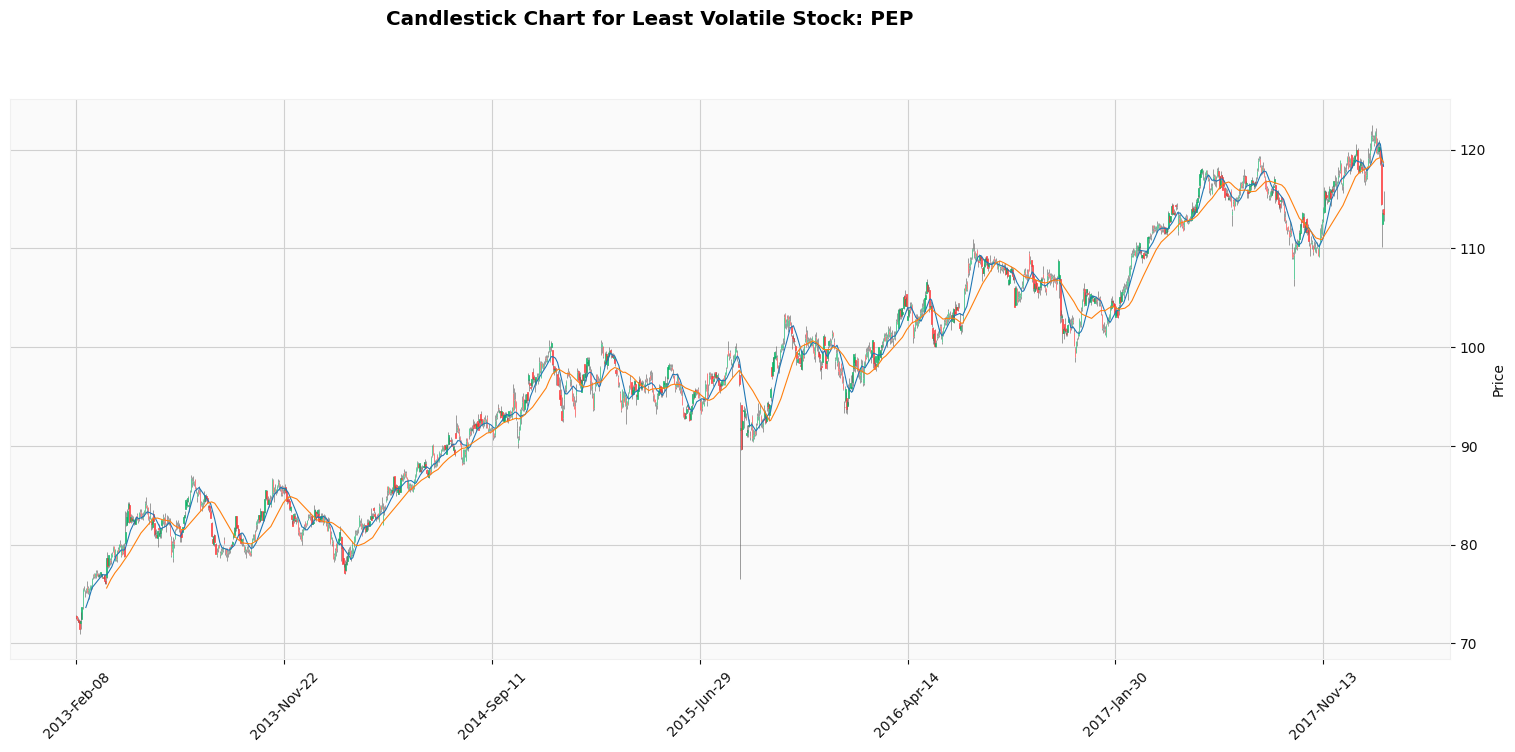

In [ ]:
volatility = df.groupby('Name')['daily_return'].std()

# Get the least volatile stock
least_volatile_stock = volatility.idxmin()

# Select data for the least volatile stock
stock_data = df[df['Name'] == least_volatile_stock][['open', 'high', 'low', 'close', 'volume']]

# Plotting the candlestick chart using mplfinance
mpf.plot(
    stock_data,
    type='candle',
    style='yahoo',  # 'yahoo' style mimics Yahoo Finance charts
    title=f'Candlestick Chart for Least Volatile Stock: {least_volatile_stock}',
    ylabel='Price',
    mav=(10, 30),
    figsize=(20, 8)
)
plt.show()

##### 1. Why did I pick the specific chart?

* The candlestick chart is a versatile tool for visualizing price movements and market sentiment over time. It provides a wealth of information in a compact format, making it a valuable tool for technical analysis.

  Specifically, this chart was selected due to the following reasons:

* Clarity and Readability: The candlestick chart effectively conveys price action, including open, high, low, and close prices, making it easy to interpret trends and patterns.
* Moving Averages: The inclusion of moving averages (10-day and 30-day) adds context by highlighting short-term and long-term trends, facilitating trend identification and potential reversal signals.
* Low Volatility: The chart depicts a stock with relatively low volatility, making it an ideal candidate for analyzing price movements and identifying potential trading opportunities in a less volatile market.
* Historical Context: The chart covers a significant time frame, allowing for the observation of long-term trends and potential cyclical patterns.

##### 2. What is/are the insight(s) found from the chart?

  Based on the candlestick chart, several key insights can be gleaned:

* Low Volatility: The stock exhibits relatively small price fluctuations during the analyzed period, indicating a less volatile trading environment compared to other stocks.
* Upward Trend: The overall trend appears to be upward, with higher highs and higher lows suggesting a bullish sentiment.
* Moving Average Crossovers: The 10-day moving average crossing above the 30-day moving average (golden cross) signals a potential strengthening of the uptrend.
* Candlestick Patterns: While not explicitly labeled, candlestick patterns like "bullish engulfing" or "hammer" might be present, indicating potential price reversals or continuations of the trend.
* Price Action: By analyzing the individual candlesticks, traders can identify periods of bullish and bearish momentum, potential support and resistance levels, and potential entry and exit points.

# **Conclusion**

This project involved a comprehensive analysis of historical stock market data to identify potential investment opportunities, assess market trends, and provide actionable recommendations for a hedge fund. We utilized various data manipulation techniques, statistical analyses, and visualizations to extract meaningful insights from the dataset. Our analysis covered several dimensions, including stock price trends, volatility, returns, and seasonal patterns.

## **Investment opportunity Identification:**

  Performance of Equities with High Potential Growth:

1. LNT (Alliant Energy Corporation):

  * Insight:
    LNT consistently maintained higher closing prices compared to other stocks in the dataset. This steady performance indicates its potential as a reliable investment. The stock's upward trend over the years suggests it has been growing steadily, making it a strong candidate for future growth.

  * Analysis: The stability and consistent upward trend in LNT's stock price make it an attractive option for investors looking for growth opportunities. Its resilience and performance over the analyzed period highlight its potential for long-term gains.

2. PEP (PepsiCo) and PG (Procter & Gamble):

  * Insight: Both PEP and PG showed consistent growth over the five-year period, suggesting reliable performance and market confidence. These stocks exhibited lower volatility, which is appealing for investors seeking stability along with growth.

  * Analysis: The steady growth and market confidence in PEP and PG indicate that these stocks are likely to continue performing well in the future. Their lower volatility makes them suitable for risk-averse investors looking for stable yet profitable investments.

## Market trend analysis



#### Risks and Opportunities:

* **Risks**:

* High Volatility Stocks:

  * Insight: Stocks like CHK (Chesapeake Energy Corporation) and FCX (Freeport-McMoRan) displayed significant volatility, which poses higher risks for investors. These stocks experienced large price fluctuations, making them unpredictable and challenging to manage.

  * Analysis: The high volatility in CHK and FCX suggests that these stocks are more susceptible to market dynamics and external factors, increasing the risk for investors. Caution should be exercised when considering these stocks for investment.

* External Events:

  * Insight: Noticeable spikes and drops in stocks such as BHGE (Baker Hughes) around significant events or market reactions indicate the impact of external factors on stock prices. These events can lead to sudden and unexpected changes in stock values.

  * Analysis: Understanding the impact of external events on stock prices is crucial for managing investment risks. Investors should stay informed about market news and events that could influence stock performance to anticipate and mitigate potential risks.

* **Opportunities**:

* Consistent Upward Trends:

  * Insight: Stocks like LNT, PEP, and PG demonstrated steady growth, indicating strong investment opportunities. The consistent upward trends in these stocks suggest they are likely to continue performing well.

  * Analysis: Investing in stocks with consistent upward trends can provide stable returns and lower risk. LNT, PEP, and PG offer promising opportunities for long-term growth, making them suitable additions to a diversified portfolio.

* Stable Stocks:

  * Insight: Stocks with lower volatility, such as WM (Waste Management) and KO (Coca-Cola), offer stable investment options with lower risk. These stocks showed relatively stable trends in their closing prices, making them less susceptible to market fluctuations.

  * Analysis: Stable stocks like WM and KO can provide a solid foundation for a diversified portfolio, offering reliable returns with lower risk. These stocks are ideal for investors seeking stability and consistent performance.

## Actionable recommendation

#### **For the Hedge Fund:**

* Diversify Portfolio:

  * Recommendation: Invest in a mix of high-growth potential stocks like LNT, PEP, and PG, along with stable stocks such as WM and KO to balance growth and risk. Diversification helps manage investment risk by spreading it across different asset classes and sectors.

  * Rationale: A diversified portfolio can provide a balance of stability and growth, reducing the impact of any single stock's poor performance on the overall investment strategy. By including both high-growth and stable stocks, the hedge fund can maximize returns while minimizing risks.

* Monitor Volatile Stocks:

  * Recommendation: Keep an eye on high-volatility stocks like CHK and FCX. While they pose higher risks, they may offer significant returns during favorable market conditions. Regularly monitoring these stocks can help identify opportunities for short-term gains.

  * Rationale: Volatile stocks can offer lucrative returns if managed carefully. By closely monitoring market conditions and stock performance, the hedge fund can take advantage of short-term trading opportunities while managing the associated risks.

* Leverage Moving Averages:

  * Recommendation: Use short-term (10-day and 30-day) and long-term (90-day) moving averages to identify trends and potential reversal signals. This can aid in making informed entry and exit decisions.

  * Rationale: Moving averages are valuable tools for identifying trends and potential changes in stock price direction. By incorporating moving averages into the investment strategy, the hedge fund can make more informed decisions about when to buy or sell stocks.

* Stay Informed on Market Events:

  * Recommendation: Keep abreast of market news and events that could impact stock performance. This will help in anticipating significant movements and adjusting investment strategies accordingly.

  * Rationale: Being aware of market events and their potential impact on stock prices is crucial for managing investment risks. By staying informed, the hedge fund can proactively respond to market changes and protect its investments.

* Regularly Review Performance:

  * Recommendation: Continuously analyze and review the performance of the portfolio to ensure alignment with the hedge fund's investment strategy and market conditions. Regular reviews can help identify underperforming stocks and adjust the investment strategy as needed.

  * Rationale: Regularly reviewing portfolio performance ensures that the investment strategy remains effective and aligned with market conditions. By making data-driven adjustments, the hedge fund can optimize its investment returns and manage risks effectively.

### ***Thank You!***